# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [1]:
import tensorflow as tf
boston_housing = tf.keras.datasets.boston_housing

2023-10-03 22:21:14.380450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Tasks

From the dataset, extract training and testing features and labels.

In [2]:
data = boston_housing.load_data(test_split=0.2)

In [3]:
data

((array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
          3.96900e+02, 1.87200e+01],
         [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
          3.95380e+02, 3.11000e+00],
         [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
          3.75520e+02, 3.26000e+00],
         ...,
         [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
          3.62250e+02, 7.83000e+00],
         [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
          2.61950e+02, 1.57900e+01],
         [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
          3.76700e+02, 4.38000e+00]]),
  array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
         17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
         32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
         23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
         12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.

In [4]:
import numpy as np

X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential([
    Dense(13, input_dim=13, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1) 
])


Print the model summary to get an overview of it in the cell below.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 64)                896       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1143 (4.46 KB)
Trainable params: 1143 (4.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['mean_squared_error']) 

Fit the model on the train data. 1000 epochs should be more than enough.

In [9]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
11/11 [==============================] - 1s 16ms/step - loss: 298.0691 - mean_squared_error: 298.0691 - val_loss: 129.0252 - val_mean_squared_error: 129.0252
Epoch 2/1000
11/11 [==============================] - 0s 4ms/step - loss: 134.8719 - mean_squared_error: 134.8719 - val_loss: 107.3670 - val_mean_squared_error: 107.3670
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 97.7307 - mean_squared_error: 97.7307 - val_loss: 81.8483 - val_mean_squared_error: 81.8483
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 83.8443 - mean_squared_error: 83.8443 - val_loss: 73.8205 - val_mean_squared_error: 73.8205
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 73.9131 - mean_squared_error: 73.9131 - val_loss: 75.5299 - val_mean_squared_error: 75.5299
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 70.0916 - mean_squared_error: 70.0916 - val_loss: 76.6028 - val_mean_squared_error: 76.

Finally, evaluate your model on the test data and get the score.

In [10]:
loss, mse = model.evaluate(X_test, y_test)

print(f"Mean Squared Error on test data: {mse}")

4/4 [==============================] - 0s 2ms/step - loss: 23.6459 - mean_squared_error: 23.6459
Mean Squared Error on test data: 23.64586639404297


Further suggestions:

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model?

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

In [11]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)


Epoch 1/1000
11/11 [==============================] - 0s 8ms/step - loss: 11.2753 - mean_squared_error: 11.2753 - val_loss: 26.4566 - val_mean_squared_error: 26.4566
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 11.0886 - mean_squared_error: 11.0886 - val_loss: 31.2179 - val_mean_squared_error: 31.2179
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step - loss: 13.0086 - mean_squared_error: 13.0086 - val_loss: 28.1533 - val_mean_squared_error: 28.1533
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 13.2171 - mean_squared_error: 13.2171 - val_loss: 25.1144 - val_mean_squared_error: 25.1144
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step - loss: 13.3841 - mean_squared_error: 13.3841 - val_loss: 23.9243 - val_mean_squared_error: 23.9243
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step - loss: 12.9079 - mean_squared_error: 12.9079 - val_loss: 24.7036 - val_mean_squared_error: 24.7036
Epoc

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1, len(train_loss) + 1))

df = pd.DataFrame({
    'Epochs': epochs * 2,
    'Loss': train_loss + val_loss,
    'Type': ['Train'] * len(train_loss) + ['Validation'] * len(val_loss)
})

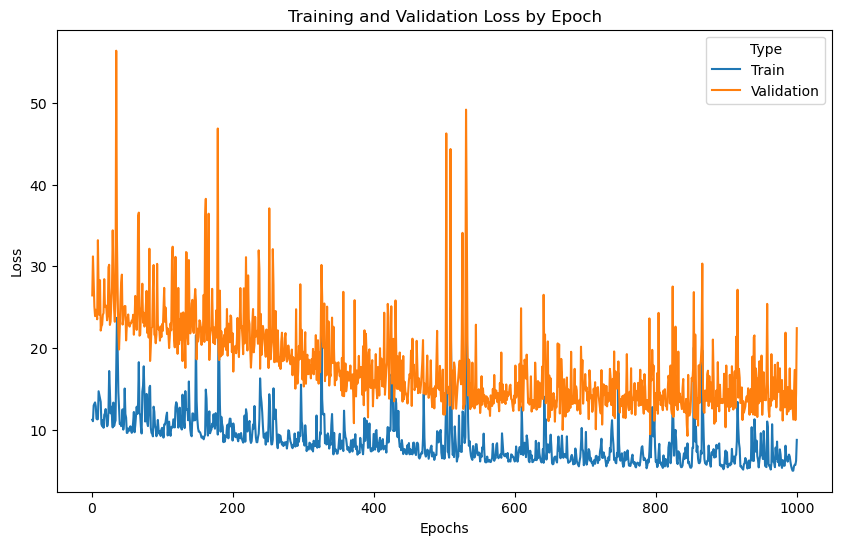

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Epochs', y='Loss', hue='Type')
plt.title('Training and Validation Loss by Epoch')
plt.show()